In [1]:
import tensorflow as tf
import numpy as np

In [2]:
learning_rate = 0.01
training_steps = 1000
display_step = 50

In [3]:
X = np.array([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
              7.042,10.791,5.313,7.997,5.654,9.27,3.1])
Y = np.array([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
              2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = X.shape[0]

In [4]:
W = tf.Variable(np.random.randn(), name="weight")
b = tf.Variable(np.random.randn(), name="bias")

def linear_regression(x):
    return W * x + b

def mean_square(y_pred, y_true):
    return tf.reduce_sum(tf.pow(y_pred-y_true,2))/ (2*n_samples)

optimizer = tf.optimizers.SGD(learning_rate)

In [5]:
def run_optimization():
    with tf.GradientTape() as g:
        pred = linear_regression(X)
        loss = mean_square(pred, Y)
        
        gradients = g.gradient(loss, [W,b])
        
        optimizer.apply_gradients(zip(gradients, [W,b]))

In [6]:
for step in range(1, training_steps+1):
    run_optimization()
    
    if step % display_step == 0:
        pred = linear_regression(X)
        loss = mean_square(pred, Y)
        print("step: %i, loss: %f, w: %f, b: %f" %(step, loss, W.numpy(), b.numpy()))

step: 50, loss: 0.115526, w: 0.363017, b: 0.009152
step: 100, loss: 0.111111, w: 0.356454, b: 0.055679
step: 150, loss: 0.107202, w: 0.350278, b: 0.099464
step: 200, loss: 0.103740, w: 0.344466, b: 0.140670
step: 250, loss: 0.100673, w: 0.338996, b: 0.179448
step: 300, loss: 0.097958, w: 0.333849, b: 0.215941
step: 350, loss: 0.095552, w: 0.329005, b: 0.250284
step: 400, loss: 0.093422, w: 0.324446, b: 0.282603
step: 450, loss: 0.091536, w: 0.320156, b: 0.313018
step: 500, loss: 0.089865, w: 0.316119, b: 0.341641
step: 550, loss: 0.088386, w: 0.312319, b: 0.368577
step: 600, loss: 0.087076, w: 0.308744, b: 0.393926
step: 650, loss: 0.085915, w: 0.305379, b: 0.417782
step: 700, loss: 0.084887, w: 0.302212, b: 0.440232
step: 750, loss: 0.083977, w: 0.299232, b: 0.461359
step: 800, loss: 0.083171, w: 0.296428, b: 0.481242
step: 850, loss: 0.082457, w: 0.293788, b: 0.499953
step: 900, loss: 0.081825, w: 0.291305, b: 0.517561
step: 950, loss: 0.081265, w: 0.288967, b: 0.534132
step: 1000, l

In [7]:
import matplotlib.pyplot as plt

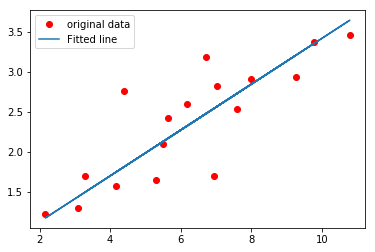

In [8]:
plt.plot(X, Y, 'ro', label='original data')
plt.plot(X, np.array(W*X+b), label='Fitted line')
plt.legend()
plt.show()